# **Clasificación binaria con Regresión Logística, Árbol de Decisión y Random Forest**

### **¿Cómo podemos predecir si un hongo es venenoso o no?**

*Los siguientes códigos fueron sugeridos por ChatGPT*

Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/mushroom_overload.csv'

Mounted at /content/drive


Importaciones

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Lectura del dataset

In [ ]:
df = pd.read_csv(file_path)

<ipython-input-4-47c250c455f0>:1: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Exploración de los datos

In [ ]:
df.head()


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,17.18,f,g,e,f,e,NaN,w,18.58,...,s,y,w,u,w,t,g,NaN,d,a
1,p,15.30,x,h,e,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.94,f,h,o,f,e,NaN,w,16.84,...,s,y,w,u,w,t,p,NaN,d,a
3,p,13.37,f,g,e,f,e,NaN,w,18.10,...,s,y,w,u,w,t,g,NaN,d,u
4,p,17.23,x,h,e,f,e,NaN,w,17.42,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6723116 entries, 0 to 6723115
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 1.1+ GB


Categóricos a numéricos

In [ ]:
# Codificar la columna 'class'
label_encoder = LabelEncoder()
df['class'] = label_encoder.fit_transform(df['class'])

# Ver los valores codificados
print(df['class'].value_counts())

class
1    3680184
0    3042932
Name: count, dtype: int64


In [ ]:
# Codificar características categóricas (excepto 'class')
df_encoded = pd.get_dummies(df.drop('class', axis=1))

# Separar características y variable objetivo
X = df_encoded
y = df['class']

División del conjunto de Entrenamiento y Pruebas

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Métricas**

In [ ]:
metrics = {
    'Model': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

Función para extraer las métricas

In [ ]:
def extract_metrics(report, model_name):
    lines = report.split('\n')
    for line in lines[2:-3]:
        parts = line.split()
        if len(parts) > 3:
            metrics['Model'].append(model_name)
            metrics['Precision'].append(float(parts[1]))
            metrics['Recall'].append(float(parts[2]))
            metrics['F1-Score'].append(float(parts[3]))

# **Clasificación binaria con Regresión Logística, Árbol de Decisión y Random Forest**

Entrenamiento de modelos

In [ ]:
models = {
    'Regresión Logística': LogisticRegression(max_iter=20),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
    }

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    report_str = classification_report(y_test, y_pred)
    extract_metrics(report_str, name)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics)

# Ver los primeros datos para asegurar que se ha almacenado correctamente
print(metrics_df.head())

                 Model  Precision  Recall  F1-Score
0  Regresión Logística       0.77    0.78      0.78
1  Regresión Logística       0.82    0.81      0.81
2    Árbol de Decisión       1.00    1.00      1.00
3    Árbol de Decisión       1.00    1.00      1.00
4        Random Forest       1.00    1.00      1.00


Gráficas

<ipython-input-16-88a5584ffb0c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0], palette='viridis')
<ipython-input-16-88a5584ffb0c>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1], palette='viridis')
<ipython-input-16-88a5584ffb0c>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[2], palette='viridis')


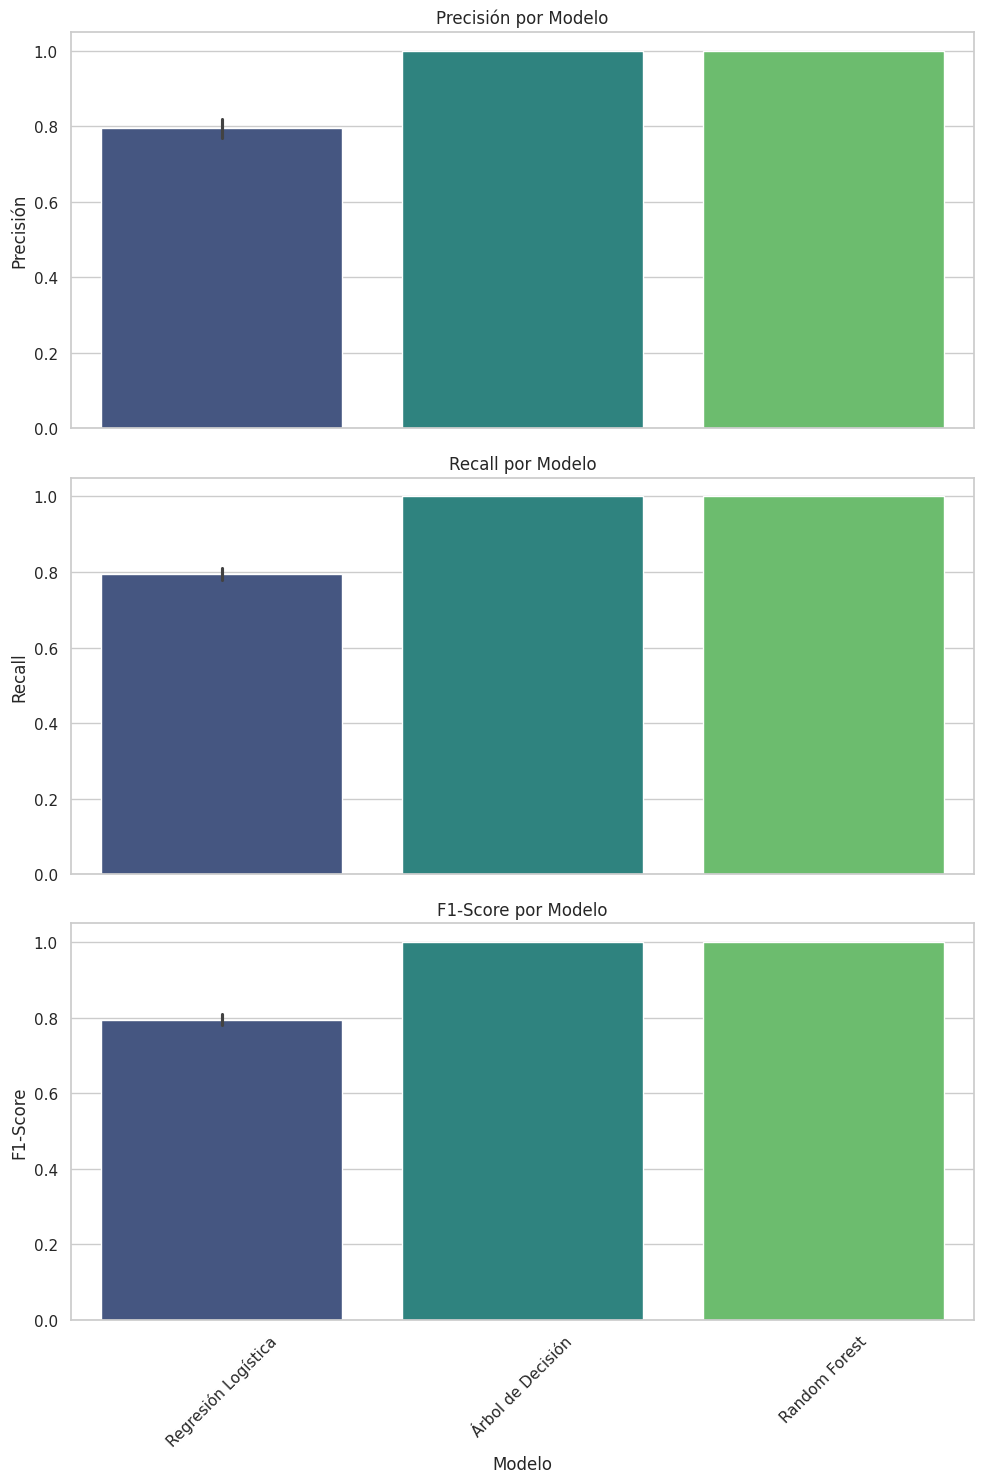

In [ ]:
# Configurar el estilo de las gráficas
sns.set(style="whitegrid")

# Gráfica de Precisión, Recall y F1-Score
fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Precisión
sns.barplot(x='Model', y='Precision', data=metrics_df, ax=axes[0], palette='viridis')
axes[0].set_title('Precisión por Modelo')
axes[0].set_ylabel('Precisión')

# Recall
sns.barplot(x='Model', y='Recall', data=metrics_df, ax=axes[1], palette='viridis')
axes[1].set_title('Recall por Modelo')
axes[1].set_ylabel('Recall')

# F1-Score
sns.barplot(x='Model', y='F1-Score', data=metrics_df, ax=axes[2], palette='viridis')
axes[2].set_title('F1-Score por Modelo')
axes[2].set_ylabel('F1-Score')
axes[2].set_xlabel('Modelo')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Matrices de Confusión

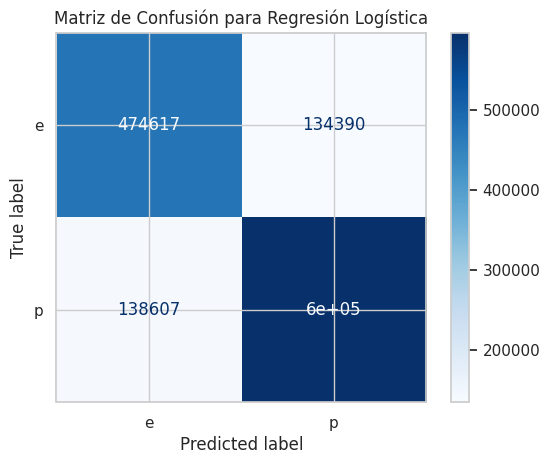

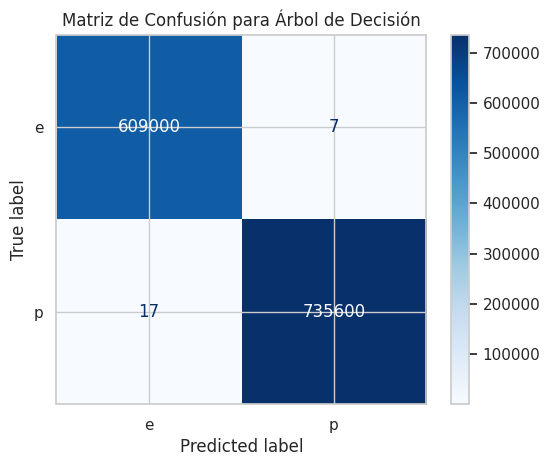

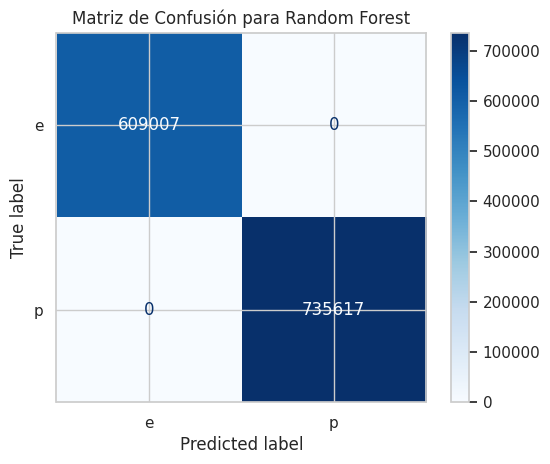

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear matrices de confusión para cada modelo
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Matriz de Confusión para {name}')
    plt.show()
